<a href="https://colab.research.google.com/github/saccordi/Analise_de_imoveis_com_Pandas/blob/master/Analise_de_imoveis_com_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bem-vindo(a) ao meu notebook!**


Este projeto simula a demanda de uma empresa imobiliária fictícia. Com o propósito de oferecer suporte à equipe de machine learning e aos desenvolvedores do site da referida empresa, será feita uma analise dos imóveis da cidades do Rio de Janeiro. Ao longo desse notebook, exploraremos as características gerais de uma base de dados, conduziremos análises exploratórias, lidaremos com valores nulos, removeremos registros inconsistentes, aplicaremos filtros e criaremos colunas distintas.

In [1]:
# importando a biblioteca Pandas
import pandas as pd

## Obtendo os dados

Os dados foram disponibilizados pela própria imobiliária fitícia e se referem aos imóveis do Rio de Janeiro.

In [2]:
# atribuindo o caminho a uma variável
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'

## Dicionário da dados



*   **Tipo:** tipo do imóvel
*   **Bairro:** bairro em que está localizado
*   **Quartos:** quantidade de quartos do imóvel
*   **Vagas:** quantidade de vagas de garagem
*   **Suites:** quantidade de suites do imóvel
*   **Area:** área total do imóvel
*   **Valor:** valor de aluguel do imóvel
*   **Condominio:** valor do condomínio
*   **IPTU:** valor do IPTU










## Primeiras análises

O primeiro passo do projeto é verificar algumas características gerais, como quantidade de linhas e colunas, quais as colunas da base de dados, explorar as diferentes colunas existentes e verificar os tipos dos dados.

In [3]:
# lendo o arquivo
# usando o separador como ";" para melhor formatação
# visualizando as 5 primeiras linhas
dados = pd.read_csv(url, sep = ";")
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
# visualizando as 5 últimas linhas
dados.tail()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN
32959,Conjunto Comercial/Sala,Centro,0,0,0,250,6500.0,4206.0,1109.0


In [5]:
# verificando o tipo de dado do conjunto de dados
type(dados)

pandas.core.frame.DataFrame

In [6]:
# contando o número de linhas e colunas
print(f"Número de Linhas: {dados.shape[0]}")
print(f"Número de Colunas: {dados.shape[1]}")

Número de Linhas: 32960
Número de Colunas: 9


In [7]:
# visualizando as colunas do Dataframe
dados.columns

Index(['Tipo', 'Bairro', 'Quartos', 'Vagas', 'Suites', 'Area', 'Valor',
       'Condominio', 'IPTU'],
      dtype='object')

In [8]:
# visualizando as informações gerais do Dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [9]:
# analisando a coluna Tipo isoladamente
dados.Tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [10]:
# visualizando a quantidade por tipo
dados['Tipo'].value_counts()

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Chácara                            1
Pousada/Chalé                      1
Indústria                          1
Name: Tipo, dtype: int64

### Conclusão das primeiras análises
Nessa primeira análise, podemos perceber que o conjunto de dados possui no total **32960** linhas e **9** colunas. Porém nas colunas `Valor`, `Condominio` e `IPTU`, a quantidade de linhas é menor que o total.
Além disso, alguns tipos de imóveis possuem poucos registros como `Chácara` e `Hotel`.

Sendo assim, exitem valores que devem ser tratados nessas colunas e, possivelmente, alguns tipos de imóveis que podem ser removidos.


## Análise Exploratória de Dados (EDA)

A primeira demanda do time de Machine Learning é uma analise exploratória dos dados.  

In [11]:
# visualizando as primeiras linhas do Dataset
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [12]:
# visualizando dados estatísticos gerais
dados.describe()

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
count,32960.000000,32960.000000,32960.000000,32960.000000,3.294300e+04,2.886700e+04,2.272300e+04
mean,1.771390,1.749059,0.665777,231.901547,1.295266e+04,2.388062e+03,2.364410e+03
std,1.717869,20.380402,1.176525,1135.254152,6.675220e+05,3.918496e+04,1.795641e+05
min,0.000000,0.000000,0.000000,0.000000,7.500000e+01,1.000000e+00,1.000000e+00
25%,0.000000,0.000000,0.000000,55.000000,1.500000e+03,5.900000e+02,1.100000e+02
50%,2.000000,1.000000,0.000000,87.000000,2.800000e+03,9.900000e+02,2.500000e+02
75%,3.000000,2.000000,1.000000,170.000000,6.500000e+03,1.800000e+03,6.970000e+02
max,100.000000,1966.000000,70.000000,90000.000000,1.200000e+08,6.552570e+06,2.705307e+07


In [13]:
# obtendo a média de valor do aluguel dos imóveis
print(f"Média do aluguel do imóveis: {round(dados['Valor'].mean())}")

Média do aluguel do imóveis: 12953


In [14]:
# obtendo a média de cada coluna por tipo de imóvel
dados.groupby('Tipo').mean(numeric_only=True)

,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
Tipo,,,,,,,
Apartamento,2.481569,1.232388,0.875998,119.790498,4744.614648,1722.653697,686.170413
Box/Garagem,0.060976,1.304878,0.000000,17.524390,1899.756098,305.450000,125.846154
Casa,3.133402,1.795243,1.258532,250.578077,6793.454922,931.280952,1582.506394
Casa Comercial,1.562264,2.203774,0.260377,372.241509,14478.264151,1935.709677,1707.386740
Casa de Condomínio,4.007028,3.101406,2.864458,456.161647,11952.061245,1342.025527,3252.517730
Casa de Vila,1.927711,0.389558,0.228916,78.469880,1574.369478,138.768421,183.878788
Chácara,3.000000,0.000000,0.000000,0.000000,4900.000000,NaN,NaN
Conjunto Comercial/Sala,0.040939,2.516801,0.010858,214.472487,14715.045521,4512.218100,1399.596571
Flat,1.415966,0.962185,0.754202,65.483193,4546.189076,2027.720554,493.166667


In [15]:
# obtendo a média do valor do aluguel por tipo de imóvel
# visualizando como um Dataframe
# ordenando por ordem crescente
dados.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

,Valor
Tipo,
Quitinete,1246.840909
Pousada/Chalé,1480.000000
Casa de Vila,1574.369478
Box/Garagem,1899.756098
Studio,2400.000000
Loft,2557.882353
Flat,4546.189076
Apartamento,4744.614648
Chácara,4900.000000


In [16]:
# visualizando a porcentagem que cada tipo de imóvel representa no Dataframe
dados.Tipo.value_counts(normalize=True)*100

Apartamento                    59.259709
Conjunto Comercial/Sala        20.676578
Loja/Salão                      4.326456
Casa de Condomínio              3.021845
Casa                            2.933859
Quitinete                       2.536408
Galpão/Depósito/Armazém         1.890170
Flat                            1.444175
Prédio Inteiro                  0.913228
Casa Comercial                  0.804005
Casa de Vila                    0.755461
Loja Shopping/ Ct Comercial     0.749393
Box/Garagem                     0.248786
Terreno Padrão                  0.212379
Loft                            0.154733
Sítio                           0.030340
Loteamento/Condomínio           0.015170
Studio                          0.012136
Hotel                           0.006068
Chácara                         0.003034
Pousada/Chalé                   0.003034
Indústria                       0.003034
Name: Tipo, dtype: float64

<ipython-input-17-c46fecd3df49>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_preco_tipo = dados.groupby('Tipo').mean()[['Valor']].sort_values("Valor")


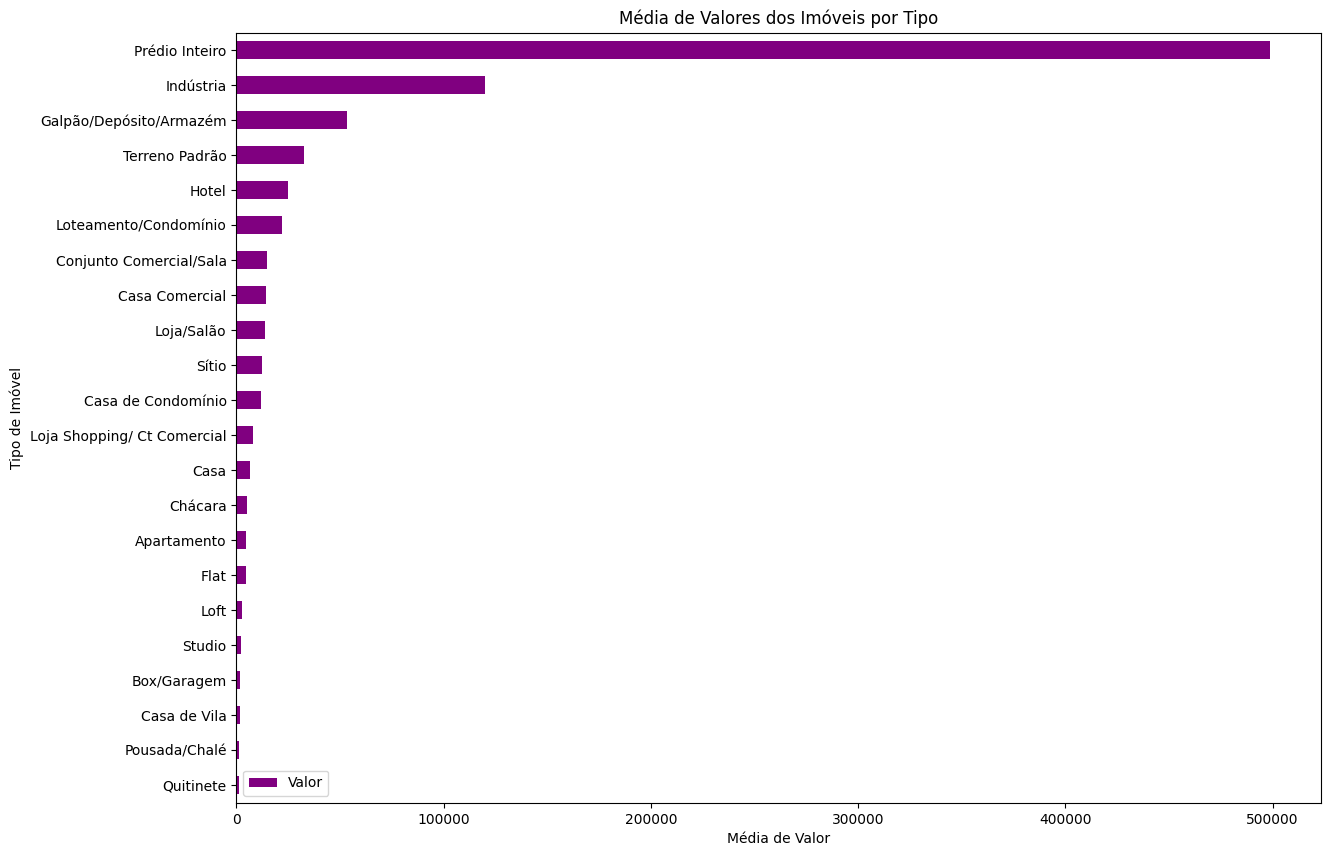

In [17]:
# mostrando um gráfico com a média de valores por tipo de imóvel
import matplotlib.pyplot as plt


df_preco_tipo = dados.groupby('Tipo').mean()[['Valor']].sort_values("Valor")

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='purple')
plt.title('Média de Valores dos Imóveis por Tipo')
plt.xlabel('Média de Valor')
plt.ylabel('Tipo de Imóvel')
plt.show()

### Conclusão da análise exploratória de dados
Analisando esse gráfico que mostra as médias por tipo de imóvel, percebe-se que existe uma diferença muito grande entre os imóveis comerciais e residenciais. Dessa forma, optou-se por retirar os comerciais e deixar apenas os residenciais.

## Removendo os imóveis comerciais

In [18]:
# visualizando os tipos de imóveis do Dataframe
dados.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [19]:
# criando uma lista com os imóveis comerciais que não serão utilizados
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']


In [20]:
# selecionando apenas os imóveis que não são do tipo comercial
dados.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [21]:
# salvando a seleção em uma variável
df = dados.query('@imoveis_comerciais not in Tipo')

# visualizando as primeiras linhas
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [22]:
# conferindo se existem apenas imóveis residenciais na nova variável
df.Tipo.unique()

array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Flat',
       'Casa de Vila', 'Loft', 'Studio'], dtype=object)

## Analisando os imóveis residenciais
Agora que apenas os imóveis residenciais forma selecionado

In [23]:
# visualizando as primeiras linhas dos imóveis
df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


<ipython-input-24-83eb30555ac0>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_preco_tipo = df.groupby('Tipo').mean()[['Valor']].sort_values("Valor")


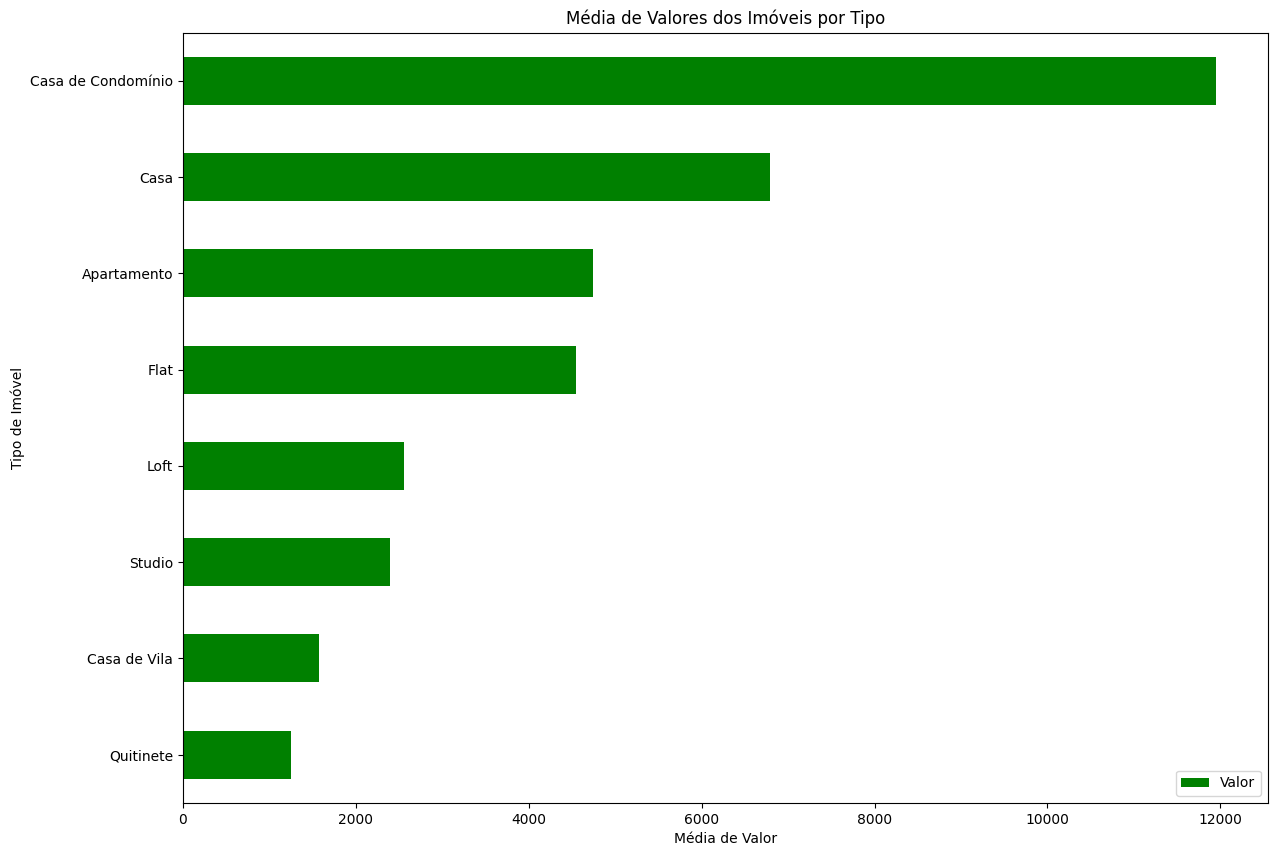

In [24]:
# mostrando um gráfico com a média de valores por tipo de imóvel
df_preco_tipo = df.groupby('Tipo').mean()[['Valor']].sort_values("Valor")

df_preco_tipo.plot(kind='barh', figsize=(14, 10), color='green')
plt.title('Média de Valores dos Imóveis por Tipo')
plt.xlabel('Média de Valor')
plt.ylabel('Tipo de Imóvel')
plt.show()

In [25]:
# visualizando a porcentagem que cada tipo de imóvel representa no Dataframe
df.Tipo.value_counts(normalize=True)*100

Apartamento           84.513868
Casa de Condomínio     4.309636
Casa                   4.184155
Quitinete              3.617325
Flat                   2.059625
Casa de Vila           1.077409
Loft                   0.220674
Studio                 0.017308
Name: Tipo, dtype: float64

In [26]:
# atribuindo a visualização a uma variável
percentual_tipo_imovel = df.Tipo.value_counts(normalize=True)*100

In [27]:
# melhorando a visualização do Dataframe de porcentagem dos imóvies
percentual_tipo_imovel = percentual_tipo_imovel.to_frame().sort_values('Tipo')
percentual_tipo_imovel.rename(columns={'Tipo': 'Percentuais'}, inplace=True)
percentual_tipo_imovel

,Percentuais
Studio,0.017308
Loft,0.220674
Casa de Vila,1.077409
Flat,2.059625
Quitinete,3.617325
Casa,4.184155
Casa de Condomínio,4.309636
Apartamento,84.513868


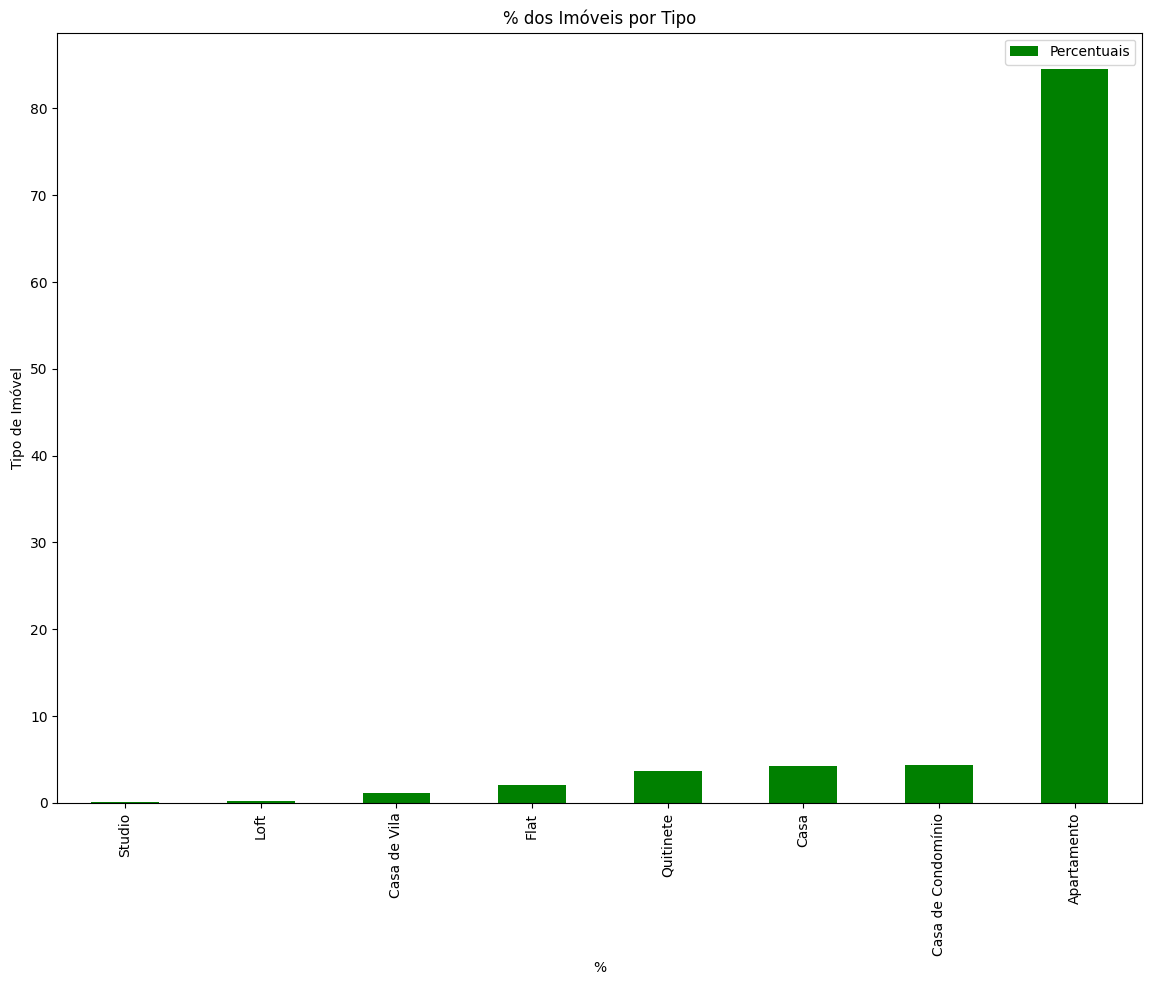

In [28]:
# mostrando um gráfico com a porcentagem de cada tipo de imóvel
percentual_tipo_imovel.plot(kind='bar', figsize=(14, 10), color='green')
plt.title('% dos Imóveis por Tipo')
plt.xlabel('%')
plt.ylabel('Tipo de Imóvel')
plt.show()

### Conclusão da análise dos imóveis residenciais
Após análise dos imóveis residenciais, percebe-se que a grande maioria dos imóveis é do tipo `Apartamento`e os demais possuem uma representação muito pequena. Além disso, casas e apartamentos do Rio de Janeiro possuem características muito distintas. Consequentemente, os preços dos aluguéis desses imóveis também variam bastante, como notamos na análise anterior. Dessa forma,faz sentido trabalhar apenas com os imóveis do tipo apartamento.

## Selecionando apenas os imóveis do tipo apartamento

In [29]:
# selecionando apenas imóveis do tipo Apartamento
df.query('Tipo == "Apartamento"')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [30]:
# atribuindo os imóveis do tipo Apartamento a uma variável
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


## Tratando dados nulos
Na analise anterior foi possível perceber que existem dados nulos. Esses dados serão tratados nesse etapa.



In [31]:
# contando os valores nulos por coluna
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

As colunas `Valor`, `Condominio` e `IPTU` possuem valores nulos. Por serem culunas com valores numéricos, esses valores serão substituidos pelo valor zero.

In [32]:
# substituindo os valores nulos por zero
df = df.fillna(0)

In [33]:
# confirmando que não há valores nulos nas colunas
df.isnull().sum()

Tipo          0
Bairro        0
Quartos       0
Vagas         0
Suites        0
Area          0
Valor         0
Condominio    0
IPTU          0
dtype: int64

## Removendo registros com valor zero
Alguns registros existentes na base de dados não fazem muito sentido, como apartamentos que possuem valor de aluguel e condomínio igual a 0.
Esses registros são inconsistentes e, por isso, serão removidos da base de dados.

In [34]:
# selecionando os imóveis que possuem valor ou IPTU igual a zero
df.query('Valor == 0 | IPTU == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,0.0,0.0
10,Apartamento,Centro,1,0,0,36,1200.0,0.0,0.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,0.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0
...,...,...,...,...,...,...,...,...,...
32915,Apartamento,Flamengo,1,0,0,48,2200.0,478.0,0.0
32925,Apartamento,Campinho,2,0,0,63,800.0,392.0,0.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,0.0
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,0.0


In [35]:
# visualizando os índices dos imóveis que possuem valor ou IPTU igual a zero
df.query('Valor == 0 | IPTU == 0').index

Int64Index([    4,     5,    10,    23,    24,    32,    36,    47,    48,
               71,
            ...
            32877, 32881, 32882, 32901, 32906, 32915, 32925, 32944, 32951,
            32958],
           dtype='int64', length=5476)

In [36]:
# armazenando os índices em uma variável
registros_a_remover = df.query('Valor == 0 | IPTU == 0').index

In [37]:
# removendo os registros
# axis=0 refere-se às linhas/axis=1 refere-se àscolunas
# inplace para sobrescrever o df
df.drop(registros_a_remover, axis=0, inplace=True)

In [38]:
# verificando se de fato foram todos removidos
# em caso positivo, retornará um Dataframe vazio
df.query('Valor == 0 | IPTU == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [39]:
# visualizando as primeiras linhas do Dataframe atualizado
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0


Anteriormente, foram selecionados apenas imóveis do Tipo `Apartamento`. Dessa forma, não faz sentido manter a coluna `Tipo`.

In [40]:
# verificando se de fato exitem apenas Apartamento na coluna Tipo
df.Tipo.unique()

array(['Apartamento'], dtype=object)

In [41]:
# removendo a coluna Tipo
# axis=0 refere-se às linhas/axis=1 refere-se às colunas
# inplace para sobrescrever o df
df.drop('Tipo', axis=1, inplace=True)

In [42]:
# visualizando as primeiras linhas do Dataframe atualizado
df.head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
6,Cachambi,2,0,0,50,1300.0,301.0,17.0
11,Grajaú,2,1,0,70,1500.0,642.0,74.0
12,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0


## Aplicando Filtros
O time de ML precisa de algumas informações específicas para avaliar o orçamento de alguns apartamentos. São elas:


1.   Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200,00;

2.   Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000,00 e área maior que 70 metros quadrados



### Filtro 1: Apartamentos que possuem 1 quarto e aluguel menor que R$ 1200,00


In [43]:
# selecionando apartamentos com 1 quarto
# transformanda a series selecao_1 em Dataframe
selecao_1 = df['Quartos'] == 1
df[selecao_1].head(5)

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
13,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
55,Ipanema,1,0,0,35,2000.0,650.0,75.0


In [44]:
# selecionando apartamentos com 1 quarto
# transformanda a series selecao_1 em Dataframe
selecao_2 = df['Valor'] < 1200
df[selecao_2].head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
19,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
77,Cachambi,2,0,0,60,1000.0,380.0,280.0


In [45]:
# criando um Dataframe com as duas seleções
filtro_1 = (selecao_1) & (selecao_2)
df[filtro_1].head()

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Centro,1,0,0,15,800.0,390.0,20.0
28,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Centro,1,0,0,27,750.0,371.0,19.0
94,Centro,1,1,0,37,1100.0,540.0,900.0
148,Vila Isabel,1,0,0,37,1000.0,285.0,24.0


In [46]:
# armazenando em uma variável o filtro 1
df_1 = df[filtro_1]

### Filtro 2: Apartamentos que possuem pelo menos 2 quartos, aluguel menor que R$ 3000,00 e área maior que 70 metros quadrados

In [47]:
filtro_2 = (df["Quartos"] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)
df_2 = df[filtro_2]

## Salvando os arquivos para o time de ML

In [48]:
# salvando o arquivo principal como csv
# visualisando como foi salvo
df.to_csv('dados_apartamento.csv', index=False, sep = ';')
pd.read_csv('dados_apartamento.csv', sep = ";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Cachambi,2,0,0,50,1300.0,301.0,17.0
2,Grajaú,2,1,0,70,1500.0,642.0,74.0
3,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
4,Copacabana,1,0,1,40,2000.0,561.0,50.0
...,...,...,...,...,...,...,...,...
14051,Ipanema,3,1,2,150,15000.0,1400.0,600.0
14052,Tijuca,1,0,0,28,1000.0,360.0,25.0
14053,Méier,2,0,0,70,900.0,490.0,48.0
14054,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [49]:
# salvando os dados filtrados 1
# visualisando como foi salvo
df_1.to_csv('dados_apartamento_filtro_1.csv', index = False, sep = ";")
pd.read_csv('dados_apartamento_filtro_1.csv', sep = ";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Centro,1,0,0,15,800.0,390.0,20.0
1,Tijuca,1,0,0,48,750.0,772.0,25.0
2,Centro,1,0,0,27,750.0,371.0,19.0
3,Centro,1,1,0,37,1100.0,540.0,900.0
4,Vila Isabel,1,0,0,37,1000.0,285.0,24.0
...,...,...,...,...,...,...,...,...
322,Grajaú,1,1,0,56,1100.0,580.0,420.0
323,Pechincha,1,0,1,69,900.0,640.0,126.0
324,Glória,1,0,0,46,1100.0,453.0,32.0
325,Botafogo,1,0,0,21,1000.0,282.0,25.0


In [50]:
# salvando os dados filtrados 2
# visualisando como foi salvo
df_2.to_csv('dados_apartamento_filtro_2.csv', index = False, sep = ";")
pd.read_csv('dados_apartamento_filtro_2.csv', sep = ";")

,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
1,Tijuca,2,1,0,110,1900.0,700.0,138.0
2,Barra da Tijuca,3,1,1,72,2350.0,600.0,70.0
3,Recreio dos Bandeirantes,3,1,2,92,2300.0,840.0,200.0
4,Recreio dos Bandeirantes,2,1,2,83,1600.0,1160.0,157.0
...,...,...,...,...,...,...,...,...
3214,Recreio dos Bandeirantes,2,1,1,105,2100.0,648.0,156.0
3215,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
3216,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
3217,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0


## Demanda do time de desenvolvomento da imóbiliaria

A partir de agora, seram realizadas as demandas do time de desenvolvimento do site da imobiliária.
São elas:


*   **valor_por_mes**: essa coluna deve conter os gastos mensais de cada imóvel, incluindo aluguel e condomínio;
*   **valor_por_ano**: essa coluna deve conter os gastos anuais por imóvel, ou seja, IPTU mais 12 meses de aluguel e condomínio;
*   **Descrição**: essa coluna deve possuir uma sumarização das principais informações dos imóveis que serão apresentadas no site: tipo de imóvel, bairro, quantidade de quartos e vagas de garagem;
*   **Possui_suite**: essa deve ser uma coluna que informa apenas se o imóvel possui ou não suítes, sem se importar com a quantidade.

Para atender a essas demandas, o conjunto de dados original será importado novamente, sem os filtros aplicados durante as solicitações do time de ML.



In [51]:
# importando a base de dados original
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [52]:
# criando a coluna valor_por_mes e tratando os dados NaN
dados.fillna(0,inplace = True)
dados['valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [53]:
# criando a coluna valor_por_ano e tratando os dados NaN
dados.fillna(0,inplace = True)
dados['valor_por_ano'] = (dados['valor_por_mes'] * 12) + dados['IPTU']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0


In [54]:
# criando a coluna Descrição
dados['Descricao'] = dados['Tipo'] + ' em  ' + dados['Bairro'] + ' com ' + dados['Quartos'].astype(str) + ' quarto(s) e ' + dados['Vagas'].astype(str) + ' vaga(s) na garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca co...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) e...


In [55]:
dados['Possui_suite'] = dados['Suites'].map({True: 'Sim', False: 'Não'})
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,NaN
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca co...,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,NaN
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) e...,NaN


In [56]:
# criando a coluna Possui_suite
dados['Possui_suite'] = dados['Suites'].apply(lambda x: 'Sim' if x > 0 else 'Não')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,valor_por_mes,valor_por_ano,Descricao,Possui_suite
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,26460.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...,Não
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,84000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 v...,Sim
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,111751.0,Conjunto Comercial/Sala em Barra da Tijuca co...,Não
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,14300.0,Apartamento em Centro com 1 quarto(s) e 0 vag...,Não
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,12360.0,Apartamento em Higienópolis com 1 quarto(s) e...,Não


## Salvando o arquivo para o time de desenvovimento

In [57]:
# salvando o arquivo em formato csv
dados.to_csv('dados_completos_dev.csv', index=False, sep=';')